In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src") if "../src" not in sys.path else None 

from CANN_burak import CANN_burak
from CANN_sorscher import CANN_sorscher

### Initialise CANN

In [3]:
Ng = 4096
Np = 512
nonlinearity = "relu"
cann = CANN_sorscher(Ng, Np, nonlinearity)

In [4]:
np.linspace(0,3,4)

array([0., 1., 2., 3.])

### Forward initial state and a sequence of velocities

In [5]:
h0 = np.random.random(Ng)
vs = [np.zeros(2)]*10

hn = cann.g(h0, vs)

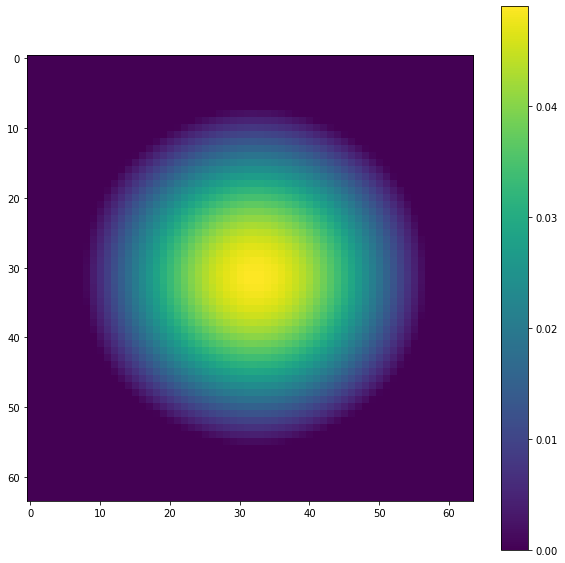

In [6]:
plt.subplots(figsize=(10,10))
plt.imshow(hn.reshape(64,64))
plt.colorbar()

### Manual dynamics

In [7]:
# hn = np.random.random(Ng) / 100
hn = np.zeros(Ng)
# hn[63] = 1
hn[2048+32] = 1
# hn[2048] = 1
# hn[:2] = 1
# hn[64:66] = 1


# v = np.ones(2) / 100
v = np.zeros(2)

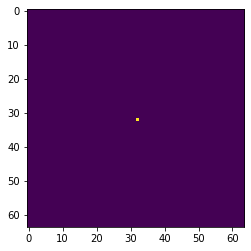

In [8]:
plt.imshow(hn.reshape(64,64))

In [9]:
(np.ones((2,)) @ np.ones(2)).shape

()

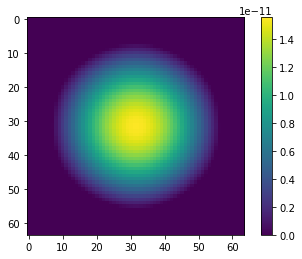

In [10]:
for i in range(100):
    hn = cann.g(hn, [v])

plt.imshow(hn.reshape(64,64))
plt.colorbar()

In [11]:
hn, cann.Wr[2048+32]

(array([-0., -0., -0., ..., -0., -0., -0.]),
 array([-0.00048011, -0.00051755, -0.00055363, ..., -0.00059573,
        -0.00051755, -0.00054904]))

In [12]:
mask = hn > 0

In [13]:
np.sum(hn[mask] - cann.Wr[:,2048+32][mask])

-1.5899813004026866

In [14]:
np.ones(4).reshape(2,2) / np.arange(1,3)

array([[1. , 0.5],
       [1. , 0.5]])

In [15]:
np.sum(cann.Wr[:,2048+32][mask])

1.5899813130964158

In [16]:
cann.Wv[64:66]

array([[ 1., -0.],
       [-1., -1.]], dtype=float32)

In [17]:
cann.Wv.shape

(4096, 2)

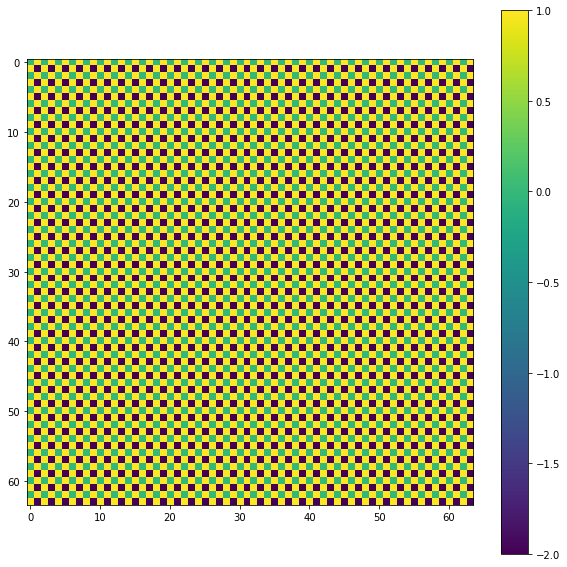

In [18]:
plt.subplots(figsize=(10,10))
plt.imshow(np.sum(cann.Wv,axis=-1).reshape(64,64))
plt.colorbar()

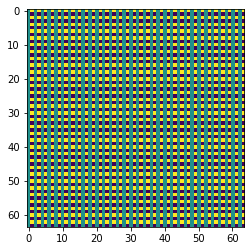

In [19]:
plt.imshow(cann.Wv[...,1].reshape(64,64))